In [52]:
import os
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
train_dir = r'C:\Users\Steven\CIS579-Project\data3a\training'
val_dir = r'C:\Users\Steven\CIS579-Project\data3a\validation'

In [54]:
img_width, img_height = 150, 150

In [55]:
epochs = 20
batch_size=32

In [56]:
# Define cost estimation based on severity level
def estimate_cost(severity):
    if severity == 'minor':
        return "$0 - $200"
    elif severity == 'moderate':
        return "$201 - $500"
    elif severity == 'severe':
        return "$501+"
    else:
        return "Not specified"


In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [58]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [59]:
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# minor moderate and severe (3)
model.add(Dense(3, activation='softmax'))

C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(train_generator, epochs=16, validation_data=val_generator)

C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.3509 - loss: 1.3145 - val_accuracy: 0.4597 - val_loss: 1.0815
Epoch 2/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.4043 - loss: 1.0800 - val_accuracy: 0.4637 - val_loss: 1.0437
Epoch 3/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.4261 - loss: 1.0590 - val_accuracy: 0.4960 - val_loss: 1.0195
Epoch 4/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 283ms/step - accuracy: 0.4792 - loss: 1.0307 - val_accuracy: 0.4476 - val_loss: 1.0859
Epoch 5/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.4705 - loss: 1.0366 - val_accuracy: 0.4194 - val_loss: 1.1856
Epoch 6/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.4371 - loss: 1.0618 - val_accuracy: 0.4718 - val_loss: 1.0241
Epoch 7/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.4867 - loss: 1.0132 - val_accuracy: 0.5484 - val_loss: 0.9394
Epoch 8/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.4652 - loss: 1.0083 - val_accu

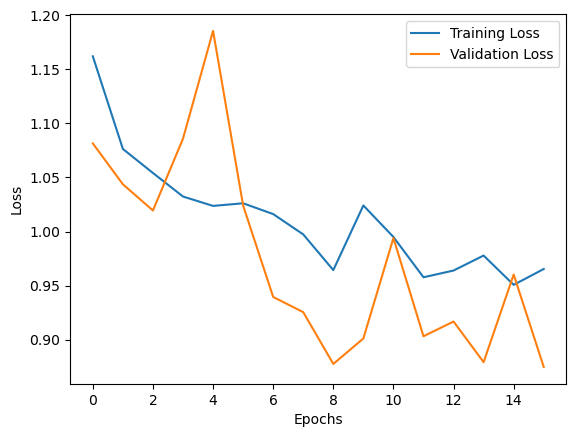

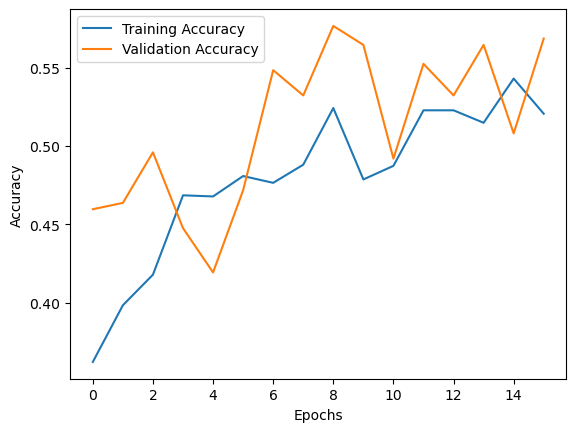

In [62]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Confusion Matrix:


C:\Users\Steven\AppData\Local\Temp\ipykernel_32236\2298795730.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
C:\Users\Steven\AppData\Local\Temp\ipykernel_32236\2298795730.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])


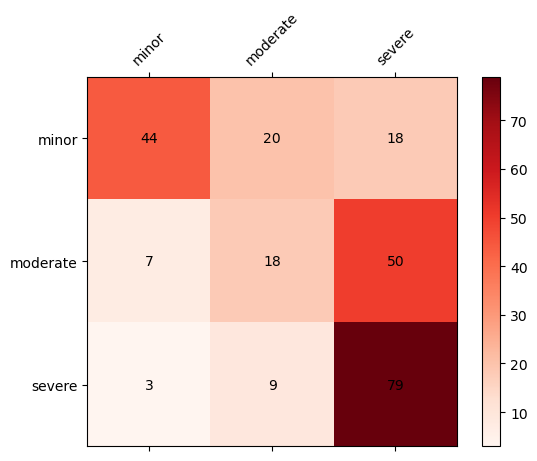

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.81      0.54      0.65        82
 02-moderate       0.38      0.24      0.30        75
   03-severe       0.54      0.87      0.66        91

    accuracy                           0.57       248
   macro avg       0.58      0.55      0.54       248
weighted avg       0.58      0.57      0.55       248



In [63]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)


from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)


In [64]:
model.save('damage_classification_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


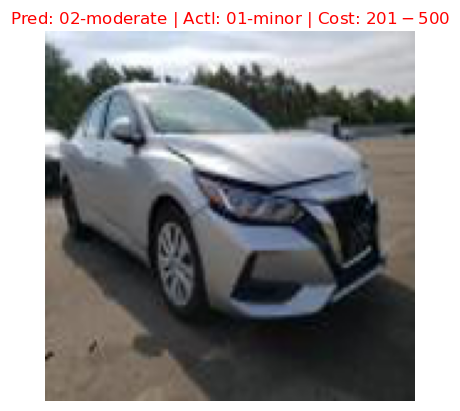

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


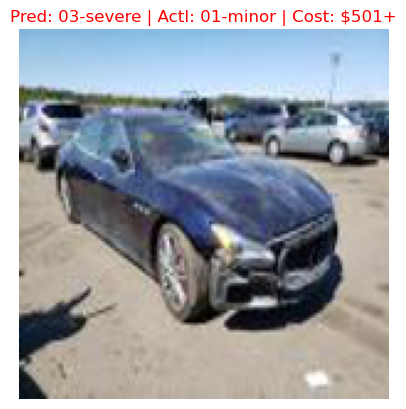

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


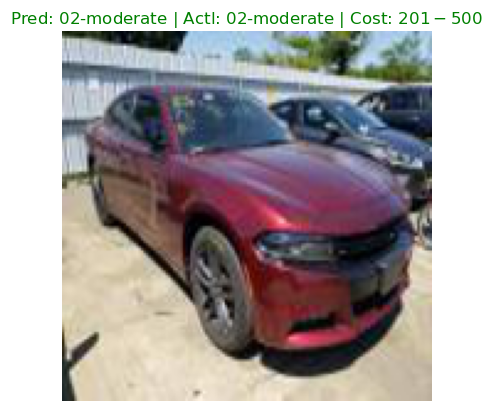

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


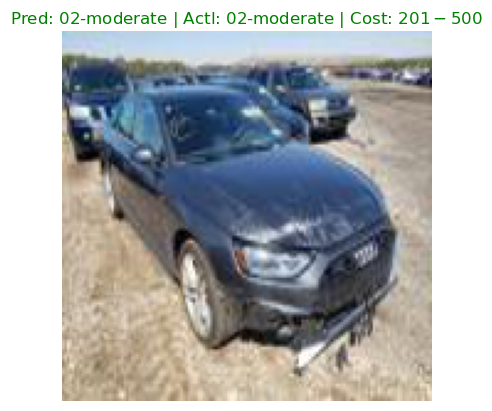

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


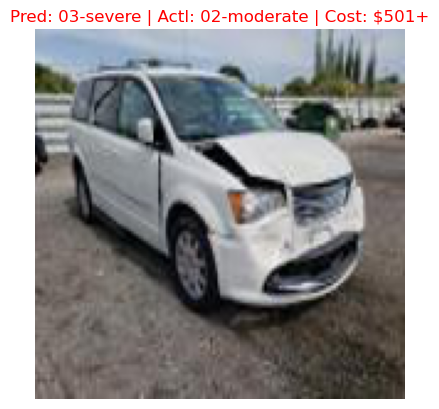

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


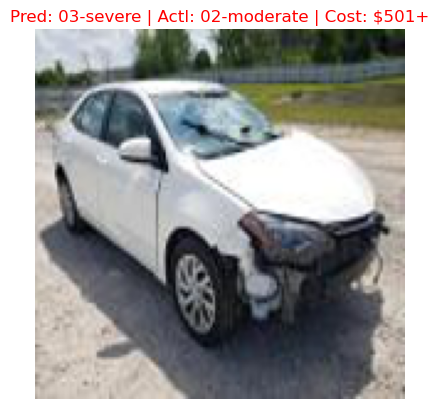

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


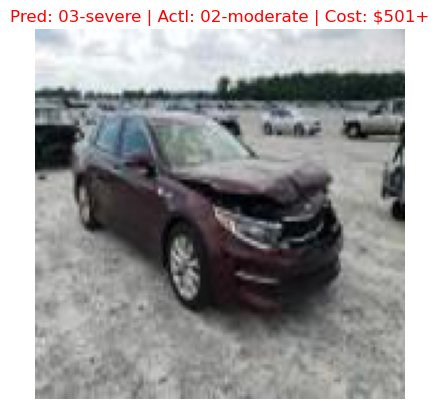

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


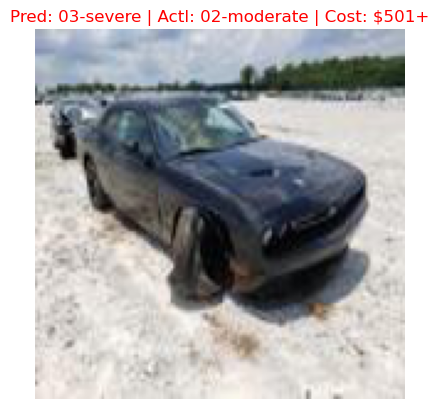

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


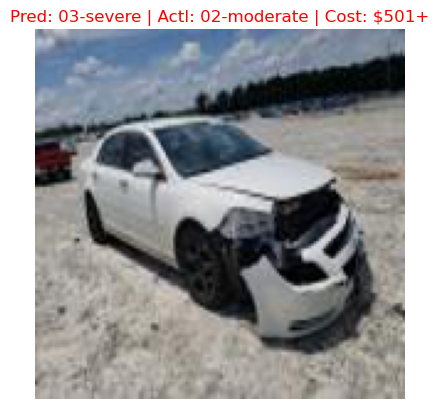

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


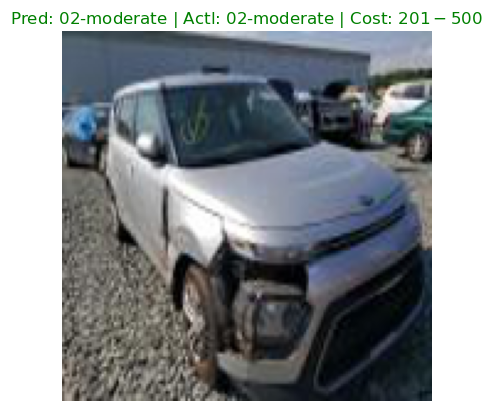

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


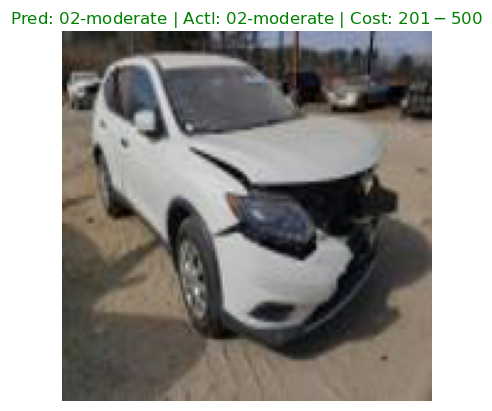

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


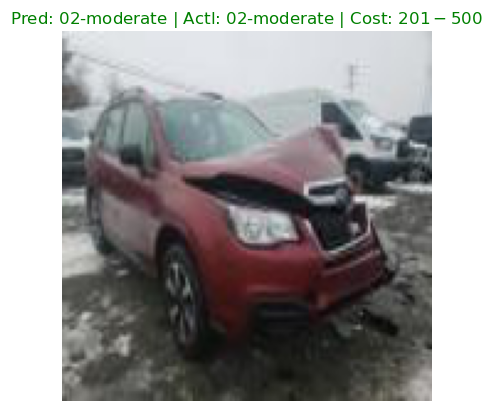

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


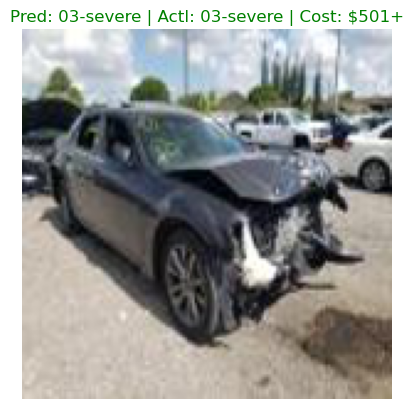

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


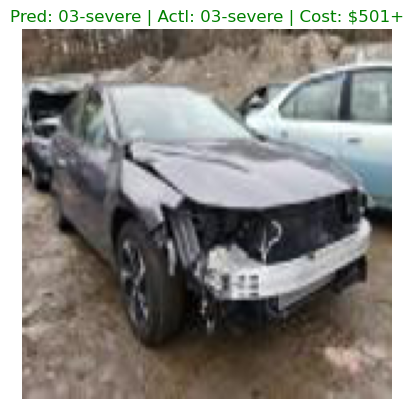

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


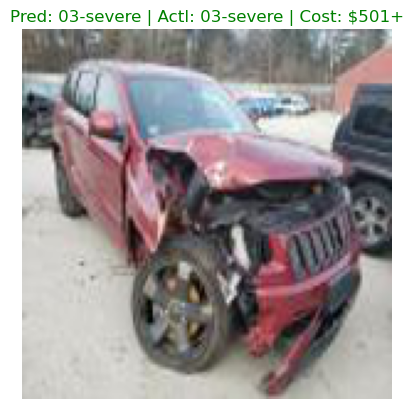

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


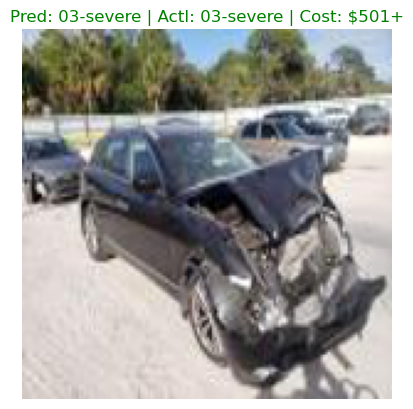

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


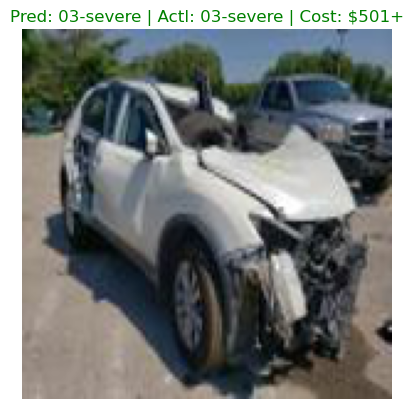

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


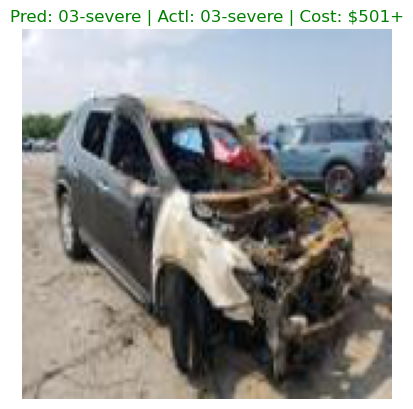

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


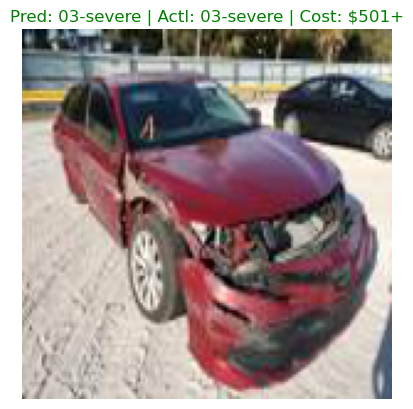

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


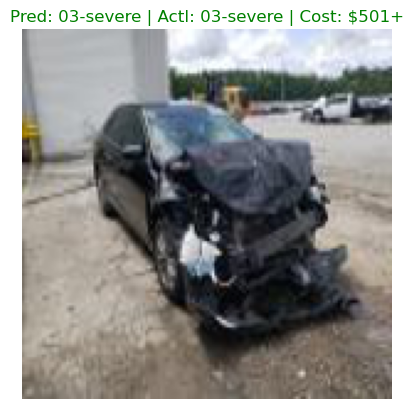

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


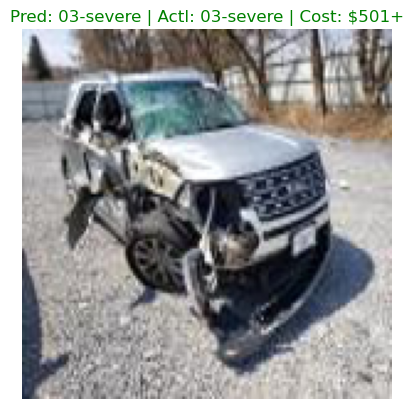

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


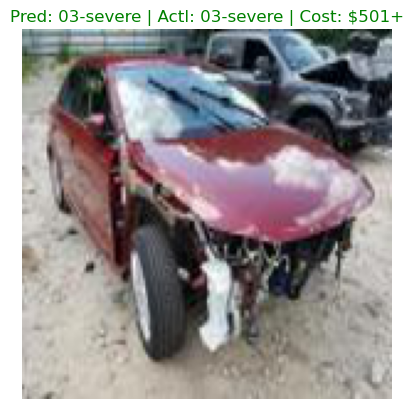

False: 7
True: 15


In [73]:
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    
    # Extract severity without prefix
    severity = pred_label.split("-")[1]  # This removes "01-", "02-", etc.
    cost_estimate = estimate_cost(severity)  # Pass the extracted severity to estimate cost

    folder_name = os.path.basename(os.path.dirname(image_path))
    
    # Display the image with prediction, actual class, and cost estimate
    plt.imshow(img[0])
    if pred_label != folder_name:
        plt.title(f'Pred: {pred_label} | Actl: {folder_name} | Cost: {cost_estimate}', color='red')
        negative += 1
    else:
        plt.title(f'Pred: {pred_label} | Actl: {folder_name} | Cost: {cost_estimate}', color='green')
        positive += 1

    plt.axis('off')
    plt.show() 
print('False: ' + str(negative) + '\nTrue: ' + str(positive))